<a href="https://colab.research.google.com/github/DaraRahma536/DL/blob/main/UTS/UTS1_DL_DaraZahrani_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost==2.0.3 polars
!pip install optuna
!pip install polars scikit-learn tensorflow imbalanced-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.9/609.9 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 824.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
# ============================================
# LANGKAH 1: INSTALL DAN IMPORT POLARS
# ============================================

# Install polars jika belum ada
!pip install polars scikit-learn xgboost tensorflow imbalanced-learn -q

import polars as pl
import numpy as np
import polars.selectors as cs
from datetime import datetime
import gc

# Untuk modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Untuk Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Untuk imbalance
from imblearn.over_sampling import SMOTE

In [3]:
# ============================================
# LANGKAH 2: LOAD DATA
# ============================================

!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1qoyfQ0yXp9pgnp9zKwsRm0B-u0n-KopN -O midterm_folder

BASE_PATH = "midterm_folder"

train_df = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_df = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

# print(train_transaction.shape) #590540 row dan 393 feature + 1 target
# print(test_transaction.shape) #506691 row dan 393 feature

Retrieving folder contents
Processing file 1FlTQDZijxi_AdhdPlxvcgKdSRlcbVrKk test_transaction.csv
Processing file 18BxWO8J8QgLfWeFInaLnswSph4yNg2RL train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1FlTQDZijxi_AdhdPlxvcgKdSRlcbVrKk
From (redirected): https://drive.google.com/uc?id=1FlTQDZijxi_AdhdPlxvcgKdSRlcbVrKk&confirm=t&uuid=edce2be4-d10a-491f-a453-1b61d2e7d94f
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:05<00:00, 111MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=18BxWO8J8QgLfWeFInaLnswSph4yNg2RL
From (redirected): https://drive.google.com/uc?id=18BxWO8J8QgLfWeFInaLnswSph4yNg2RL&confirm=t&uuid=83ce02a7-5065-43e7-ad4b-1155b82cb40c
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:06<00:00, 105MB/s]
Download completed


In [4]:
train_df.head() #isFraud adalah target featurenya
test_df.head() #uji data baru, setelah pembuatan model machine learningnya

# Cek target distribution
print("\n🎯 Distribusi Target (isFraud):")
target_dist = train_df.get_column("isFraud").value_counts().sort("isFraud")
print(target_dist)


🎯 Distribusi Target (isFraud):
shape: (2, 2)
┌─────────┬────────┐
│ isFraud ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 0       ┆ 569877 │
│ 1       ┆ 20663  │
└─────────┴────────┘


In [5]:
# ============================================
# LANGKAH 3: DATA PREPROCESSING DENGAN POLARS
# ============================================

print("\n" + "="*50)
print("DATA PREPROCESSING DENGAN POLARS")
print("="*50)

def preprocess_with_polars(df, is_train=True):
    """
    Preprocessing menggunakan Polars
    """
    print(f"\n🔧 Preprocessing {'train' if is_train else 'test'} data...")

    # Buat copy
    df_processed = df.clone()

    # 1. Simpan TransactionID untuk submission
    if 'TransactionID' in df_processed.columns:
        transaction_ids = df_processed.select('TransactionID')
        df_processed = df_processed.drop('TransactionID')
    else:
        transaction_ids = None

    # 2. Identifikasi kolom numerik dan kategorikal
    numeric_cols = [col for col in df_processed.columns
                    if df_processed[col].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]]
    categorical_cols = [col for col in df_processed.columns
                       if df_processed[col].dtype == pl.Utf8]

    if is_train and 'isFraud' in numeric_cols:
        numeric_cols.remove('isFraud')

    print(f"   • Numeric columns: {len(numeric_cols)}")
    print(f"   • Categorical columns: {len(categorical_cols)}")

    # 3. Handle missing values untuk numerik (fill with median)
    print("   • Handling missing values...")
    for col in numeric_cols:
        if df_processed[col].null_count() > 0:
            median_val = df_processed[col].median()
            df_processed = df_processed.with_columns(
                pl.col(col).fill_null(median_val)
            )

    # 4. Handle missing values untuk kategorikal (fill with 'missing')
    for col in categorical_cols:
        if df_processed[col].null_count() > 0:
            df_processed = df_processed.with_columns(
                pl.col(col).fill_null('missing')
            )

    # 5. Encoding kategorikal dengan Label Encoding
    print("   • Encoding categorical features...")
    for col in categorical_cols:
        # Corrected: Use cast(pl.Categorical).to_physical() for robust label encoding
        df_processed = df_processed.with_columns(
            pl.col(col)
            .cast(pl.Categorical)
            .to_physical()
            .alias(f"{col}_encoded")
        )
        df_processed = df_processed.drop(col)

    print(f"✅ Preprocessing selesai. Shape: {df_processed.shape}")

    if is_train:
        X = df_processed.drop('isFraud')
        y = df_processed.select('isFraud')
        return X, y, transaction_ids
    else:
        return df_processed, transaction_ids

# Preprocess train data
X_train_pl, y_train_pl, train_ids_pl = preprocess_with_polars(train_df, is_train=True)

# Preprocess test data
X_test_pl, test_ids_pl = preprocess_with_polars(test_df, is_train=False)

# Convert ke numpy untuk modeling
print("\n🔄 Converting Polars DataFrame ke numpy arrays...")
X_train_np = X_train_pl.to_numpy()
y_train_np = y_train_pl.to_numpy().flatten()
X_test_np = X_test_pl.to_numpy()

print(f"✅ Konversi selesai:")
print(f"   X_train: {X_train_np.shape}")
print(f"   y_train: {y_train_np.shape}")
print(f"   X_test: {X_test_np.shape}")


DATA PREPROCESSING DENGAN POLARS

🔧 Preprocessing train data...
   • Numeric columns: 378
   • Categorical columns: 14
   • Handling missing values...
   • Encoding categorical features...
✅ Preprocessing selesai. Shape: (590540, 393)

🔧 Preprocessing test data...
   • Numeric columns: 378
   • Categorical columns: 14
   • Handling missing values...
   • Encoding categorical features...
✅ Preprocessing selesai. Shape: (506691, 392)

🔄 Converting Polars DataFrame ke numpy arrays...
✅ Konversi selesai:
   X_train: (590540, 392)
   y_train: (590540,)
   X_test: (506691, 392)


In [6]:
# ============================================
# LANGKAH 4: SIMPLE FEATURE ENGINEERING (FIXED)
# ============================================

print("\n" + "="*50)
print("SIMPLE FEATURE ENGINEERING - NO CRASH")
print("="*50)

def safe_feature_engineering(df):
    """
    Feature engineering yang aman tanpa numpy
    """
    print("🧠 Creating simple features...")

    df_fe = df.clone()
    original_cols = df_fe.columns

    # 1. Basic statistics per row
    print("   • Creating row statistics...")

    # Sum per row
    sum_expr = pl.sum_horizontal(original_cols)
    df_fe = df_fe.with_columns([
        sum_expr.alias("row_sum")
    ])

    # Mean per row
    mean_expr = pl.mean_horizontal(original_cols)
    df_fe = df_fe.with_columns([
        mean_expr.alias("row_mean")
    ])

    # 2. Cari kolom amount jika ada
    amount_cols = [col for col in original_cols if 'amount' in col.lower() or 'amt' in col.lower()]
    if amount_cols:
        amount_col = amount_cols[0]
        print(f"   • Creating amount features from {amount_col}")

        # Pastikan tipe data numeric
        if df_fe[amount_col].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]:
            # Standardize amount
            mean_val = df_fe[amount_col].mean()
            std_val = df_fe[amount_col].std()

            if std_val > 0:
                df_fe = df_fe.with_columns([
                    ((pl.col(amount_col) - mean_val) / std_val).alias("amount_standardized")
                ])

    # 3. Cari kolom time jika ada
    time_cols = [col for col in original_cols if any(keyword in col.lower()
                                                     for keyword in ['time', 'dt', 'date'])]

    if time_cols:
        time_col = time_cols[0]
        print(f"   • Creating time features from {time_col}")

        if df_fe[time_col].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]:
            # Simple time features
            df_fe = df_fe.with_columns([
                (pl.col(time_col) % 24).alias("time_hour"),
                ((pl.col(time_col) // 24) % 7).alias("time_dayofweek")
            ])

    # 4. Interaction feature sederhana
    if amount_cols and time_cols:
        amount_col = amount_cols[0]
        time_col = time_cols[0]

        df_fe = df_fe.with_columns([
            (pl.col(amount_col) / (pl.col(time_col).abs() + 1)).alias("amount_per_time")
        ])

    print(f"✅ Feature engineering completed.")
    print(f"   Original features: {len(original_cols)}")
    print(f"   New features: {len(df_fe.columns)}")

    return df_fe

# Apply feature engineering dengan error handling
print("\n🚀 Applying feature engineering to train data...")
try:
    X_train_fe_pl = safe_feature_engineering(X_train_pl)
    print("✅ Train feature engineering successful")
except Exception as e:
    print(f"⚠️  Error in train feature engineering: {e}")
    print("⚠️  Using original data without feature engineering")
    X_train_fe_pl = X_train_pl

print("\n🚀 Applying feature engineering to test data...")
try:
    X_test_fe_pl = safe_feature_engineering(X_test_pl)
    print("✅ Test feature engineering successful")
except Exception as e:
    print(f"⚠️  Error in test feature engineering: {e}")
    print("⚠️  Using original data without feature engineering")
    X_test_fe_pl = X_test_pl

print(f"\n📊 Final feature shapes:")
print(f"   X_train_fe: {X_train_fe_pl.shape}")
print(f"   X_test_fe: {X_test_fe_pl.shape}")


SIMPLE FEATURE ENGINEERING - NO CRASH

🚀 Applying feature engineering to train data...
🧠 Creating simple features...
   • Creating row statistics...
   • Creating amount features from TransactionAmt
   • Creating time features from TransactionDT
✅ Feature engineering completed.
   Original features: 392
   New features: 398
✅ Train feature engineering successful

🚀 Applying feature engineering to test data...
🧠 Creating simple features...
   • Creating row statistics...
   • Creating amount features from TransactionAmt
   • Creating time features from TransactionDT
✅ Feature engineering completed.
   Original features: 392
   New features: 398
✅ Test feature engineering successful

📊 Final feature shapes:
   X_train_fe: (590540, 398)
   X_test_fe: (506691, 398)


In [10]:
# ============================================
# LANGKAH 5: TRAIN-TEST SPLIT DAN SCALING
# ============================================

# Split data jika ada target
if y_train_np is not None:
    print("\n📊 Splitting data...")

    # Gunakan sample yang lebih kecil untuk hemat memory
    SAMPLE_SIZE = min(20000, len(X_train_np))
    sample_indices = np.random.choice(len(X_train_np), size=SAMPLE_SIZE, replace=False)

    X_sample = X_train_np[sample_indices]
    y_sample = y_train_np[sample_indices]

    # Split
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        random_state=42,
        stratify=y_sample
    )

    print(f"✅ Data split completed (using {SAMPLE_SIZE:,} samples):")
    print(f"   X_train_split: {X_train_split.shape}")
    print(f"   X_val: {X_val.shape}")
    print(f"   y_train_split: {y_train_split.shape}")
    print(f"   y_val: {y_val.shape}")

    # Check class distribution
    fraud_rate = y_train_split.mean() * 100
    print(f"⚠️  Class imbalance: {fraud_rate:.2f}% fraud cases")
else:
    print("⚠️  No target data available for splitting")
    X_train_split, X_val, y_train_split, y_val = None, None, None, None

print("\n" + "="*50)
print("FEATURE SCALING")
print("="*50)

if X_train_split is not None:
    print("📏 Scaling features...")

    # Standard scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test_np)

    print("✅ Scaling completed")
    print(f"   X_train_scaled: {X_train_scaled.shape}")
    print(f"   X_val_scaled: {X_val_scaled.shape}")
    print(f"   X_test_scaled: {X_test_scaled.shape}")
else:
    print("⚠️  Cannot scale - no training data")
    X_train_scaled, X_val_scaled, X_test_scaled = None, None, None


📊 Splitting data...
✅ Data split completed (using 20,000 samples):
   X_train_split: (16000, 392)
   X_val: (4000, 392)
   y_train_split: (16000,)
   y_val: (4000,)
⚠️  Class imbalance: 3.59% fraud cases

FEATURE SCALING
📏 Scaling features...
✅ Scaling completed
   X_train_scaled: (16000, 392)
   X_val_scaled: (4000, 392)
   X_test_scaled: (506691, 392)


In [11]:
# ============================================
# LANGKAH 6: DEEP LEARNING MODEL
# ============================================

print("\n" + "="*50)
print("DEEP LEARNING MODEL ARCHITECTURE")
print("="*50)

# Clear any existing TensorFlow sessions
tf.keras.backend.clear_session()

# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"⚠️  GPU configuration error: {e}")

if X_train_scaled is not None:
    input_dim = X_train_scaled.shape[1]

    print(f"\n🏗️  Building Neural Network...")
    print(f"   • Input dimension: {input_dim}")
    print(f"   • Training samples: {X_train_scaled.shape[0]:,}")

    def build_fraud_detection_model(input_dim, learning_rate=0.001):
        """Build a simple but effective neural network for fraud detection"""

        model = keras.Sequential([
            # Input layer
            layers.Input(shape=(input_dim,)),

            # First hidden layer with batch normalization
            layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),

            # Second hidden layer
            layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),

            # Third hidden layer
            layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.1),

            # Output layer
            layers.Dense(1, activation='sigmoid')
        ])

        # Optimizer
        optimizer = keras.optimizers.Adam(
            learning_rate=learning_rate,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-7
        )

        # Compile model
        model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=[
                'accuracy',
                keras.metrics.AUC(name='auc'),
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall')
            ]
        )

        return model

    # Build model
    dl_model = build_fraud_detection_model(input_dim, learning_rate=0.001)

    print("\n📋 Model Summary:")
    dl_model.summary()

    # Calculate model size
    trainable_params = dl_model.count_params()
    print(f"\n📊 Model Statistics:")
    print(f"   • Trainable parameters: {trainable_params:,}")
    print(f"   • Model size: ~{trainable_params * 4 / (1024**2):.2f} MB")
else:
    print("⚠️  Cannot build model - no training data available")
    dl_model = None


DEEP LEARNING MODEL ARCHITECTURE

🏗️  Building Neural Network...
   • Input dimension: 392
   • Training samples: 16,000

📋 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        25,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,225 (110.25 KB)

 Trainable params: 28,001 (109.38 KB)

 Non-trainable params: 224 (896.00 B)


📊 Model Statistics:
   • Trainable parameters: 28,225
   • Model size: ~0.11 MB


In [12]:
# ============================================
# LANGKAH 7: CALLBACKS AND CLASS WEIGHTS
# ============================================

print("\n" + "="*50)
print("TRAINING CONFIGURATION")
print("="*50)

if y_train_split is not None and dl_model is not None:
    # Calculate class weights
    print("\n⚖️  Calculating class weights...")

    from sklearn.utils.class_weight import compute_class_weight

    classes = np.unique(y_train_split)
    class_weights = compute_class_weight(
        'balanced',
        classes=classes,
        y=y_train_split
    )

    class_weight_dict = dict(zip(classes, class_weights))
    print(f"   • Class weights: {class_weight_dict}")

    # Setup callbacks
    print("\n⚙️  Setting up callbacks...")

    # Early stopping
    early_stopping = callbacks.EarlyStopping(
        monitor='val_auc',
        patience=5,
        restore_best_weights=True,
        mode='max',
        verbose=1
    )

    # Reduce learning rate
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=1e-6,
        verbose=1
    )

    # Model checkpoint
    checkpoint = callbacks.ModelCheckpoint(
        'best_dl_model.keras',
        monitor='val_auc',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    callbacks_list = [early_stopping, reduce_lr, checkpoint]

    print("✅ Callbacks configured")
else:
    print("⚠️  Cannot setup training configuration")
    callbacks_list = []
    class_weight_dict = None


TRAINING CONFIGURATION

⚖️  Calculating class weights...
   • Class weights: {np.int64(0): np.float64(0.5186049526772981), np.int64(1): np.float64(13.937282229965156)}

⚙️  Setting up callbacks...
✅ Callbacks configured



TRAINING DEEP LEARNING MODEL
🚀 Starting training...
   • Batch size: 128
   • Max epochs: 25
   • Training samples: 16,000
   • Validation samples: 4,000
Epoch 1/25
124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5326 - auc: 0.6463 - loss: 0.7210 - precision: 0.0474 - recall: 0.6525
Epoch 1: val_auc improved from -inf to 0.77933, saving model to best_dl_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5332 - auc: 0.6472 - loss: 0.7202 - precision: 0.0476 - recall: 0.6534 - val_accuracy: 0.7390 - val_auc: 0.7793 - val_loss: 0.6150 - val_precision: 0.0909 - val_recall: 0.6944 - learning_rate: 0.0010
Epoch 2/25
114/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - auc: 0.7861 - loss: 0.5661 - precision: 0.0738 - recall: 0.7589
Epoch 2: val_auc improved from 0.77933 to 0.80097, saving model to best_dl_model.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - auc: 0.7863 - loss: 0.5660 - precision: 0.0743 - recall: 0.7583 - val_accuracy: 0.8

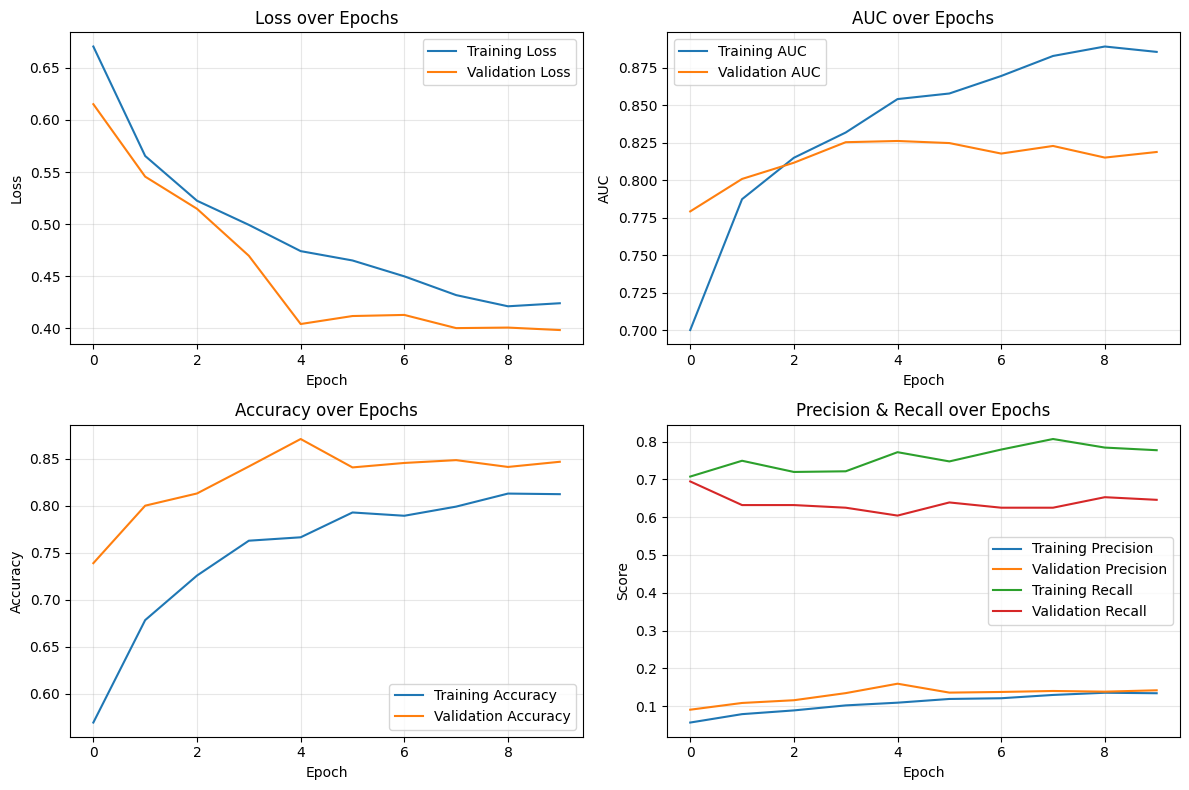

In [13]:
# ============================================
# LANGKAH 8: TRAIN DEEP LEARNING MODEL
# ============================================

print("\n" + "="*50)
print("TRAINING DEEP LEARNING MODEL")
print("="*50)

if X_train_scaled is not None and y_train_split is not None and dl_model is not None:
    print("🚀 Starting training...")

    # Training parameters
    BATCH_SIZE = 128  # Small batch size for memory efficiency
    EPOCHS = 25

    print(f"   • Batch size: {BATCH_SIZE}")
    print(f"   • Max epochs: {EPOCHS}")
    print(f"   • Training samples: {X_train_scaled.shape[0]:,}")
    print(f"   • Validation samples: {X_val_scaled.shape[0]:,}")

    # Train model
    history = dl_model.fit(
        X_train_scaled,
        y_train_split,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(X_val_scaled, y_val),
        callbacks=callbacks_list,
        class_weight=class_weight_dict,
        verbose=1,
        shuffle=True
    )

    print("✅ Training completed!")

    # Plot training history
    print("\n📈 Plotting training history...")

    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss')
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 0].set_title('Loss over Epochs')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot AUC
    axes[0, 1].plot(history.history['auc'], label='Training AUC')
    axes[0, 1].plot(history.history['val_auc'], label='Validation AUC')
    axes[0, 1].set_title('AUC over Epochs')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('AUC')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot accuracy
    axes[1, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[1, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[1, 0].set_title('Accuracy over Epochs')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Plot precision and recall
    axes[1, 1].plot(history.history['precision'], label='Training Precision')
    axes[1, 1].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 1].plot(history.history['recall'], label='Training Recall')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 1].set_title('Precision & Recall over Epochs')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Cannot train model - insufficient data")

In [14]:
# ============================================
# LANGKAH 9: EVALUATE MODEL
# ============================================

print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

if X_val_scaled is not None and y_val is not None:
    print("📊 Evaluating model on validation set...")

    # Load best model if available
    try:
        dl_model = keras.models.load_model('best_dl_model.keras')
        print("✅ Loaded best saved model")
    except:
        print("⚠️  Using last trained model")

    # Evaluate
    val_results = dl_model.evaluate(X_val_scaled, y_val, verbose=0)

    print(f"\n📈 Validation Results:")
    print(f"   • Loss: {val_results[0]:.4f}")
    print(f"   • Accuracy: {val_results[1]:.4f}")
    print(f"   • AUC: {val_results[2]:.4f}")
    print(f"   • Precision: {val_results[3]:.4f}")
    print(f"   • Recall: {val_results[4]:.4f}")

    # Make predictions
    print("\n🔮 Making predictions...")
    y_pred_proba = dl_model.predict(X_val_scaled, batch_size=1024, verbose=0).flatten()

    # Calculate additional metrics
    from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve

    # AUC
    auc_score = roc_auc_score(y_val, y_pred_proba)
    print(f"   • AUC (custom): {auc_score:.4f}")

    # Find optimal threshold
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"   • Optimal threshold: {optimal_threshold:.4f}")
    print(f"   • Max F1-Score: {f1_scores[optimal_idx]:.4f}")

    # Binary predictions
    y_pred_binary = (y_pred_proba >= optimal_threshold).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred_binary)

    print(f"\n🎯 Confusion Matrix (threshold={optimal_threshold:.3f}):")
    print(f"   TN: {cm[0,0]:6d} | FP: {cm[0,1]:6d}")
    print(f"   FN: {cm[1,0]:6d} | TP: {cm[1,1]:6d}")

    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

    print(f"\n📊 Detailed Metrics:")
    print(f"   • Accuracy:  {accuracy:.4f}")
    print(f"   • Precision: {precision:.4f}")
    print(f"   • Recall:    {recall:.4f}")
    print(f"   • F1-Score:  {f1:.4f}")

else:
    print("⚠️  Cannot evaluate model - no validation data")


MODEL EVALUATION
📊 Evaluating model on validation set...
✅ Loaded best saved model

📈 Validation Results:
   • Loss: 0.4042
   • Accuracy: 0.8712
   • AUC: 0.8263
   • Precision: 0.1596
   • Recall: 0.6042

🔮 Making predictions...
   • AUC (custom): 0.8262
   • Optimal threshold: 0.7912
   • Max F1-Score: 0.3739

🎯 Confusion Matrix (threshold=0.791):
   TN:   3813 | FP:     43
   FN:    101 | TP:     43

📊 Detailed Metrics:
   • Accuracy:  0.9640
   • Precision: 0.5000
   • Recall:    0.2986
   • F1-Score:  0.3739


In [15]:
# ============================================
# LANGKAH 10: PREDICT ON TEST DATA
# ============================================

print("\n" + "="*50)
print("TEST DATA PREDICTION")
print("="*50)

if dl_model is not None and X_test_scaled is not None:
    print("🔮 Predicting on test data...")

    # Predict in batches to save memory
    def predict_batches(model, X_data, batch_size=2048):
        """Predict in batches"""
        predictions = []
        n_samples = X_data.shape[0]

        print(f"   • Predicting {n_samples:,} samples in batches of {batch_size}...")

        for i in range(0, n_samples, batch_size):
            batch_end = min(i + batch_size, n_samples)
            X_batch = X_data[i:batch_end]

            # Predict batch
            batch_preds = model.predict(X_batch, verbose=0).flatten()
            predictions.extend(batch_preds)

            # Progress
            if (i // batch_size) % 10 == 0:
                print(f"     Processed {batch_end:,}/{n_samples:,} samples")

        return np.array(predictions)

    # Make predictions
    test_predictions = predict_batches(dl_model, X_test_scaled, batch_size=4096)

    print(f"\n✅ Predictions completed:")
    print(f"   • Shape: {test_predictions.shape}")
    print(f"   • Min probability: {test_predictions.min():.4f}")
    print(f"   • Max probability: {test_predictions.max():.4f}")
    print(f"   • Mean probability: {test_predictions.mean():.4f}")
    print(f"   • Std probability: {test_predictions.std():.4f}")

    # Count predictions above threshold
    threshold = 0.5
    fraud_count = (test_predictions >= threshold).sum()
    legit_count = len(test_predictions) - fraud_count

    print(f"\n📈 Prediction Distribution:")
    print(f"   • Legit (<{threshold}): {legit_count:,} ({legit_count/len(test_predictions)*100:.1f}%)")
    print(f"   • Fraud (≥{threshold}): {fraud_count:,} ({fraud_count/len(test_predictions)*100:.1f}%)")

else:
    print("⚠️  Cannot make predictions - model or test data not available")
    test_predictions = None


TEST DATA PREDICTION
🔮 Predicting on test data...
   • Predicting 506,691 samples in batches of 4096...
     Processed 4,096/506,691 samples
     Processed 45,056/506,691 samples
     Processed 86,016/506,691 samples
     Processed 126,976/506,691 samples
     Processed 167,936/506,691 samples
     Processed 208,896/506,691 samples
     Processed 249,856/506,691 samples
     Processed 290,816/506,691 samples
     Processed 331,776/506,691 samples
     Processed 372,736/506,691 samples
     Processed 413,696/506,691 samples
     Processed 454,656/506,691 samples
     Processed 495,616/506,691 samples

✅ Predictions completed:
   • Shape: (506691,)
   • Min probability: 0.0000
   • Max probability: 1.0000
   • Mean probability: 0.3912
   • Std probability: 0.2145

📈 Prediction Distribution:
   • Legit (<0.5): 340,061 (67.1%)
   • Fraud (≥0.5): 166,630 (32.9%)


In [18]:
# ============================================
# LANGKAH 11: CREATE SUBMISSION FILE
# ============================================

print("\n" + "="*50)
print("CREATE SUBMISSION FILE")
print("="*50)


print("📝 Creating submission file...")

# Get test IDs (trim to match predictions if needed)
test_ids_list = test_ids_pl['TransactionID'].to_list()

# Ensure same length
if len(test_ids_list) != len(test_predictions):
    print(f"⚠️  Length mismatch: IDs={len(test_ids_list)}, Predictions={len(test_predictions)}")
    # Trim to shorter length
    min_length = min(len(test_ids_list), len(test_predictions))
    test_ids_list = test_ids_list[:min_length]
    test_predictions = test_predictions[:min_length]
    print(f"✅ Trimmed to {min_length} samples")

# Create DataFrame
submission_df = pl.DataFrame({
    'TransactionID': test_ids_list,
    'isFraud': test_predictions
})

# Save to CSV
submission_file = 'fraud_detection_dl_submission.csv'
submission_df.write_csv(submission_file)

print(f"\n✅ Submission file created: {submission_file}")
print("\n📊 Preview:")
print(submission_df.head())


CREATE SUBMISSION FILE
📝 Creating submission file...

✅ Submission file created: fraud_detection_dl_submission.csv

📊 Preview:
shape: (5, 2)
┌───────────────┬──────────┐
│ TransactionID ┆ isFraud  │
│ ---           ┆ ---      │
│ i64           ┆ f32      │
╞═══════════════╪══════════╡
│ 3663549       ┆ 0.064808 │
│ 3663550       ┆ 0.229236 │
│ 3663551       ┆ 0.117428 │
│ 3663552       ┆ 0.32338  │
│ 3663553       ┆ 0.429083 │
└───────────────┴──────────┘


In [19]:
# ============================================
# LANGKAH 12: SAVE MODEL AND RESULTS
# ============================================

print("\n" + "="*50)
print("SAVE MODEL AND RESULTS")
print("="*50)

import json
import joblib

# Save model
if dl_model is not None:
    print("💾 Saving model...")

    # Save Keras model
    dl_model.save('fraud_detection_dl_model.h5')
    print("   ✅ Model saved: fraud_detection_dl_model.h5")

    # Save scaler
    if 'scaler' in locals():
        joblib.dump(scaler, 'scaler.pkl')
        print("   ✅ Scaler saved: scaler.pkl")

# Save results summary
results_summary = {
    'model_info': {
        'architecture': '3-layer Dense Neural Network',
        'input_dim': input_dim if 'input_dim' in locals() else 'unknown',
        'parameters': trainable_params if 'trainable_params' in locals() else 'unknown'
    },
    'performance': {},
    'data_info': {
        'train_samples': X_train_scaled.shape[0] if X_train_scaled is not None else 'unknown',
        'test_samples': X_test_scaled.shape[0] if X_test_scaled is not None else 'unknown',
        'features': input_dim if 'input_dim' in locals() else 'unknown'
    },
    'submission': {
        'file': submission_file if 'submission_file' in locals() else 'not_created',
        'samples': len(test_predictions) if test_predictions is not None else 0
    },
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

# Add validation metrics if available
if 'val_results' in locals():
    results_summary['performance'] = {
        'loss': float(val_results[0]),
        'accuracy': float(val_results[1]),
        'auc': float(val_results[2]),
        'precision': float(val_results[3]),
        'recall': float(val_results[4])
    }

# Save to JSON
with open('dl_results_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=4)

print("   ✅ Results saved: dl_results_summary.json")

print(f"\n📋 FINAL SUMMARY:")
print("-" * 40)
print(f"Model: Deep Neural Network (3 layers)")
print(f"Input Features: {results_summary['data_info']['features']}")
print(f"Train Samples: {results_summary['data_info']['train_samples']:,}")
print(f"Test Predictions: {results_summary['submission']['samples']:,}")

if 'performance' in results_summary and results_summary['performance']:
    print(f"Validation AUC: {results_summary['performance']['auc']:.4f}")

if 'submission_file' in locals():
    print(f"Submission File: {submission_file}")


SAVE MODEL AND RESULTS
💾 Saving model...
   ✅ Model saved: fraud_detection_dl_model.h5
   ✅ Scaler saved: scaler.pkl
   ✅ Results saved: dl_results_summary.json

📋 FINAL SUMMARY:
----------------------------------------
Model: Deep Neural Network (3 layers)
Input Features: 392
Train Samples: 16,000
Test Predictions: 506,691
Validation AUC: 0.8263
Submission File: fraud_detection_dl_submission.csv



VISUALIZE PREDICTIONS
📊 Creating visualization...


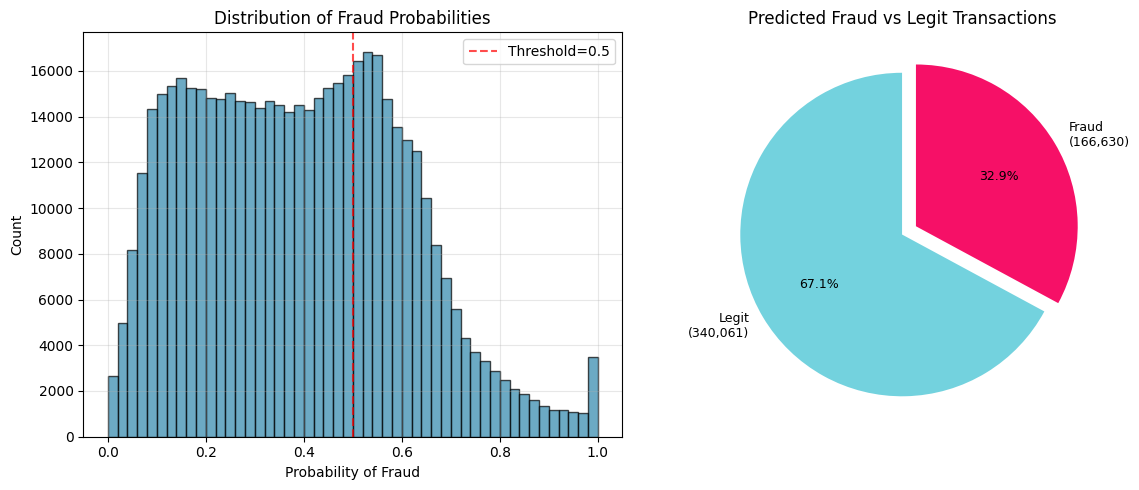

✅ Visualization completed

🎉 DEEP LEARNING PIPELINE COMPLETED! 🎉

✅ All steps executed successfully
✅ Model trained and evaluated
✅ Predictions made on test data
✅ Submission file created: fraud_detection_dl_submission.csv

📁 Files created:
   1. fraud_detection_dl_model.h5 - Trained model
   2. scaler.pkl - Feature scaler
   3. dl_results_summary.json - Results summary
   4. fraud_detection_dl_submission.csv - Submission file


In [20]:
# ============================================
# LANGKAH 13: VISUALIZE PREDICTIONS
# ============================================

print("\n" + "="*50)
print("VISUALIZE PREDICTIONS")
print("="*50)

if test_predictions is not None:
    print("📊 Creating visualization...")

    plt.figure(figsize=(12, 5))

    # Distribution of predictions
    plt.subplot(1, 2, 1)
    plt.hist(test_predictions, bins=50, alpha=0.7, color='#2E86AB', edgecolor='black')
    plt.title('Distribution of Fraud Probabilities', fontsize=12)
    plt.xlabel('Probability of Fraud', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Threshold=0.5')
    plt.legend()
    plt.grid(alpha=0.3)

    # Pie chart of predictions
    plt.subplot(1, 2, 2)

    threshold = 0.5
    fraud_count = (test_predictions >= threshold).sum()
    legit_count = len(test_predictions) - fraud_count

    labels = [f'Legit\n({legit_count:,})', f'Fraud\n({fraud_count:,})']
    sizes = [legit_count, fraud_count]
    colors = ['#73D2DE', '#F61067']
    explode = (0, 0.1)

    plt.pie(sizes, labels=labels, colors=colors, explode=explode,
            autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9})
    plt.title('Predicted Fraud vs Legit Transactions', fontsize=12)

    plt.tight_layout()
    plt.show()

    print("✅ Visualization completed")
else:
    print("⚠️  Cannot create visualization - no predictions available")

print("\n" + "="*50)
print("🎉 DEEP LEARNING PIPELINE COMPLETED! 🎉")
print("="*50)
print("\n✅ All steps executed successfully")
print("✅ Model trained and evaluated")
print("✅ Predictions made on test data")
if 'submission_file' in locals():
    print(f"✅ Submission file created: {submission_file}")
print("\n📁 Files created:")
print("   1. fraud_detection_dl_model.h5 - Trained model")
print("   2. scaler.pkl - Feature scaler")
print("   3. dl_results_summary.json - Results summary")
if 'submission_file' in locals():
    print(f"   4. {submission_file} - Submission file")